In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np
import json
import ast

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Balanceo de clases
from imblearn.under_sampling import RandomUnderSampler

# Métricas y evaluación
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Cargar el csv
df = pd.read_csv("datos_tratados.csv")

# Ver las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = df.drop(columns=["customerID"])


In [ ]:
# Convertir strings a diccionarios
for col in ["customer", "phone", "internet", "account"]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Normalizar diccionarios a columnas
customer_df = pd.json_normalize(df["customer"])
phone_df = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df = pd.json_normalize(df["account"])


In [ ]:
# Concatenar todo
df = pd.concat([df.drop(columns=["customer", "phone", "internet", "account"]),
                customer_df, phone_df, internet_df, account_df], axis=1)


In [ ]:
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
y = df["Churn"]
X = df.drop(columns=["Churn"])


In [ ]:
# Conteo absoluto
print(y.value_counts())

# Proporción
print(y.value_counts(normalize=True))


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


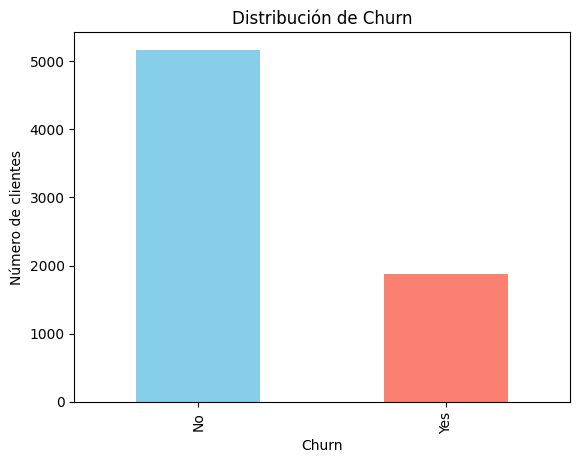

In [ ]:
y.value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

In [ ]:
y_num = y.map({"No": 0, "Yes": 1})
X_encoded = X_encoded.astype(float)


In [ ]:
mask = y.notna()  # solo filas donde y no es NaN
X_clean = X_encoded[mask]
y_clean = y_num[mask]

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_clean, y_clean)

print(y_res.value_counts())

Churn
0.0    1869
1.0    1869
Name: count, dtype: int64


In [ ]:
# Para Regresión Logística
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])

logreg_pipe.fit(X_res, y_res)

# Para Random Forest (no necesita escalado)
rf_pipe = Pipeline([
    ("clf", RandomForestClassifier(class_weight="balanced", random_state=42))
])

rf_pipe.fit(X_res, y_res)


Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
y_pred = rf_pipe.predict(X_res)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [ ]:
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
y_pred = rf_pipe.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       374
         1.0       0.76      0.80      0.78       374

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



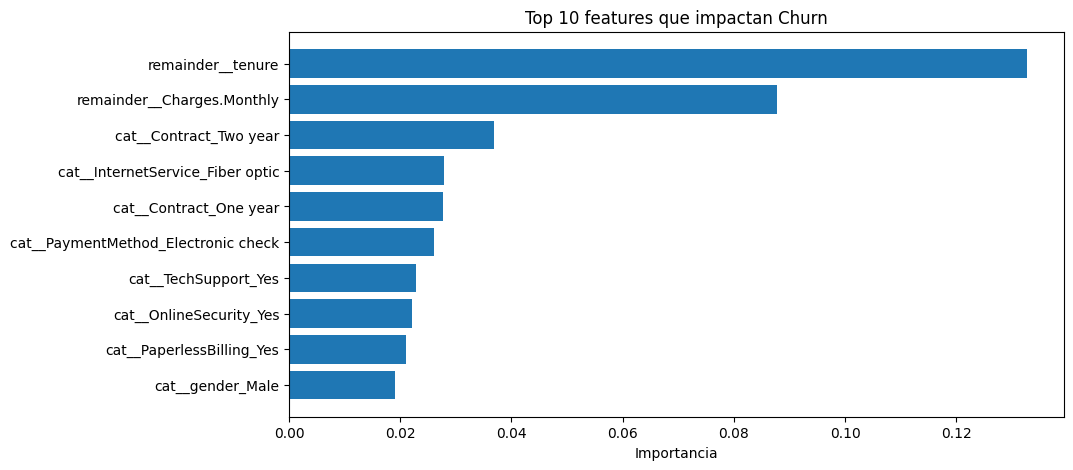

In [ ]:
feature_names = preprocessor.get_feature_names_out()
importances = rf_pipe.named_steps['clf'].feature_importances_

# Graficar top 10
indices = importances.argsort()[::-1][:10]

plt.figure(figsize=(10,5))
plt.barh(range(10), importances[indices][::-1])
plt.yticks(range(10), [feature_names[i] for i in indices][::-1])
plt.xlabel("Importancia")
plt.title("Top 10 features que impactan Churn")
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols


['SeniorCitizen', 'tenure', 'Charges.Monthly']

In [ ]:
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})


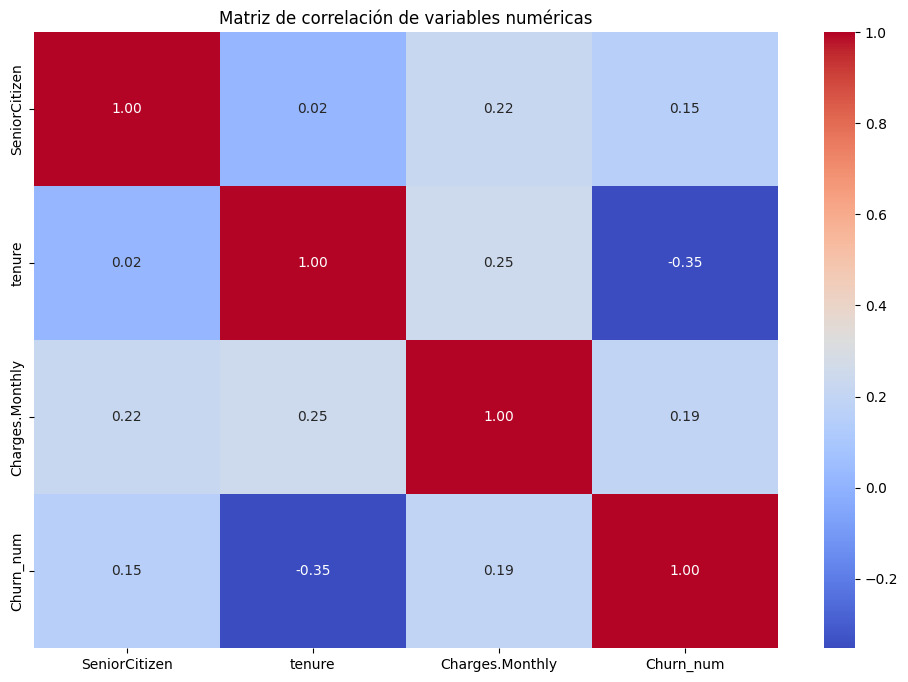

In [ ]:
corr_matrix = df[numeric_cols + ['Churn_num']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.show()


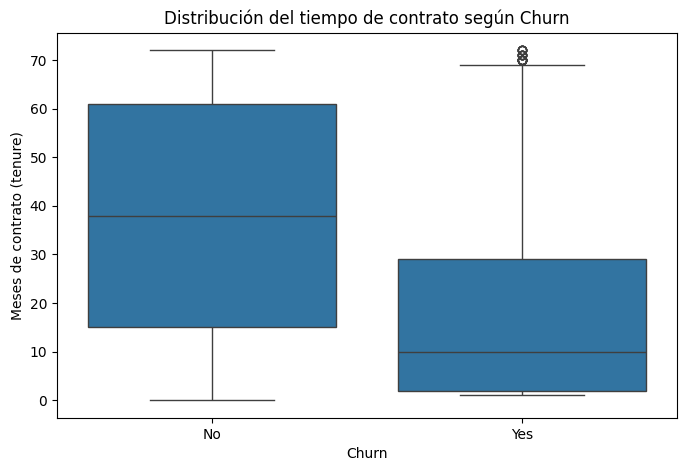

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Distribución del tiempo de contrato según Churn")
plt.ylabel("Meses de contrato (tenure)")
plt.show()


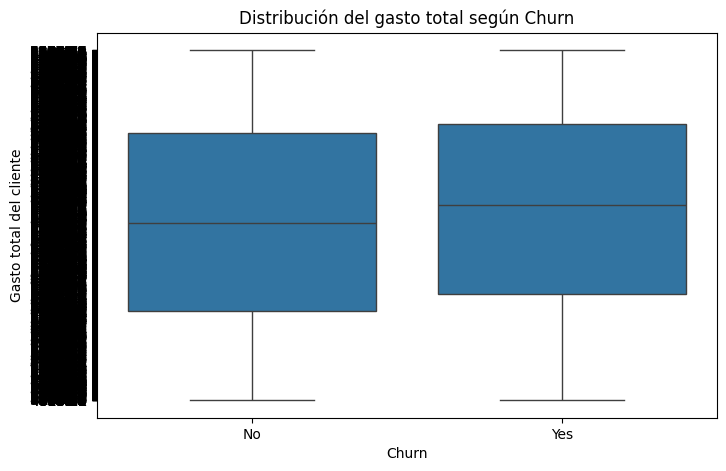

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title("Distribución del gasto total según Churn")
plt.ylabel("Gasto total del cliente")
plt.show()


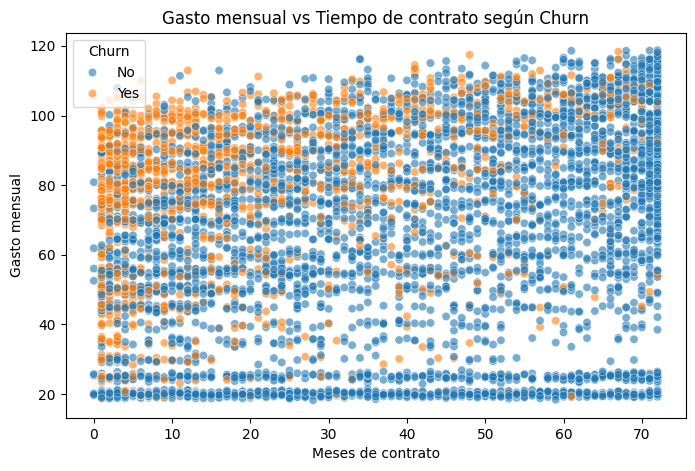

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='Charges.Monthly', hue='Churn', data=df, alpha=0.6)
plt.title("Gasto mensual vs Tiempo de contrato según Churn")
plt.xlabel("Meses de contrato")
plt.ylabel("Gasto mensual")
plt.show()


In [ ]:
# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_res,  # features balanceadas con SMOTE o RandomUnderSampler
    y_res,  # target balanceado
    test_size=0.2,
    random_state=42,
    stratify=y_res  # mantiene proporción de clases
)


In [ ]:
print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)


Tamaño entrenamiento: (2990, 6559) (2990,)
Tamaño prueba: (748, 6559) (748,)


In [ ]:
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),  # Normaliza las features
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])

# Entrenamos con el dataset de entrenamiento
logreg_pipe.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred_logreg = logreg_pipe.predict(X_test)


In [ ]:
rf_pipe = Pipeline([
    ("clf", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Entrenamos con el dataset de entrenamiento
rf_pipe.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred_rf = rf_pipe.predict(X_test)


In [ ]:
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_logreg))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Regresión Logística ===
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       374
         1.0       0.73      0.75      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       374
         1.0       0.76      0.80      0.78       374

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



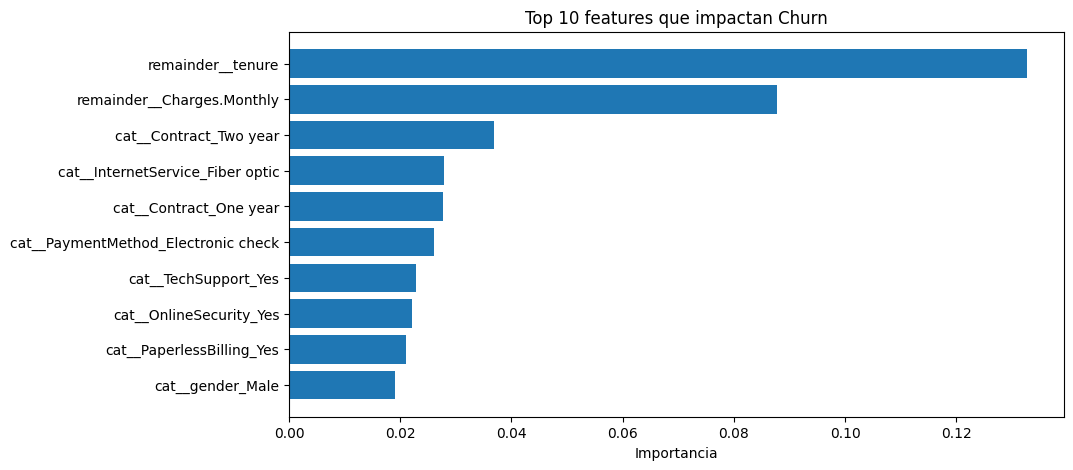

In [ ]:
feature_names = preprocessor.get_feature_names_out()
importances = rf_pipe.named_steps['clf'].feature_importances_

indices = importances.argsort()[::-1][:10]  # top 10

plt.figure(figsize=(10,5))
plt.barh(range(10), importances[indices][::-1])
plt.yticks(range(10), [feature_names[i] for i in indices][::-1])
plt.xlabel("Importancia")
plt.title("Top 10 features que impactan Churn")
plt.show()


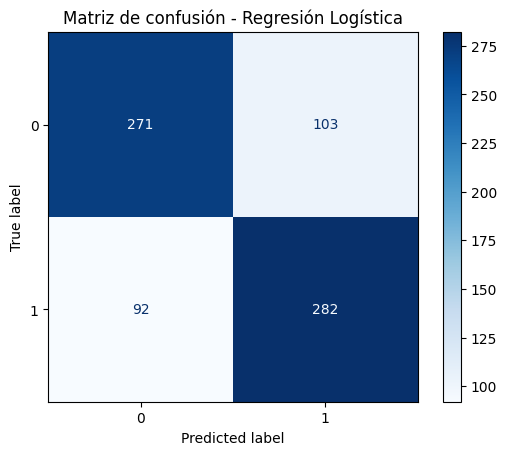

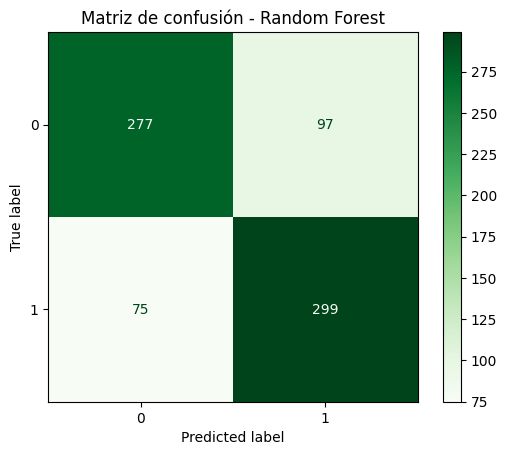

In [ ]:
# Regresión Logística
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(cm_logreg, display_labels=[0,1])
disp_logreg.plot(cmap='Blues')
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=[0,1])
disp_rf.plot(cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.show()


In [ ]:
# Obtener nombres de features tras el preprocesamiento
feature_names = preprocessor.get_feature_names_out()

# Coeficientes del modelo
coef = logreg_pipe.named_steps['clf'].coef_[0]

# Crear DataFrame
logreg_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coeficiente": coef,
    "AbsCoef": np.abs(coef)
}).sort_values(by="AbsCoef", ascending=False)

print(logreg_importance.head(10))


                                  Feature  Coeficiente   AbsCoef
6557                    remainder__tenure    -0.929873  0.929873
24    cat__PaymentMethod_Electronic check     0.912074  0.912074
21                 cat__Contract_Two year    -0.891839  0.891839
15                   cat__TechSupport_Yes    -0.807665  0.807665
9                 cat__OnlineSecurity_Yes    -0.694470  0.694470
20                 cat__Contract_One year    -0.675135  0.675135
6        cat__InternetService_Fiber optic     0.664569  0.664569
25        cat__PaymentMethod_Mailed check     0.619666  0.619666
19               cat__StreamingMovies_Yes     0.590736  0.590736
0                        cat__gender_Male     0.563645  0.563645


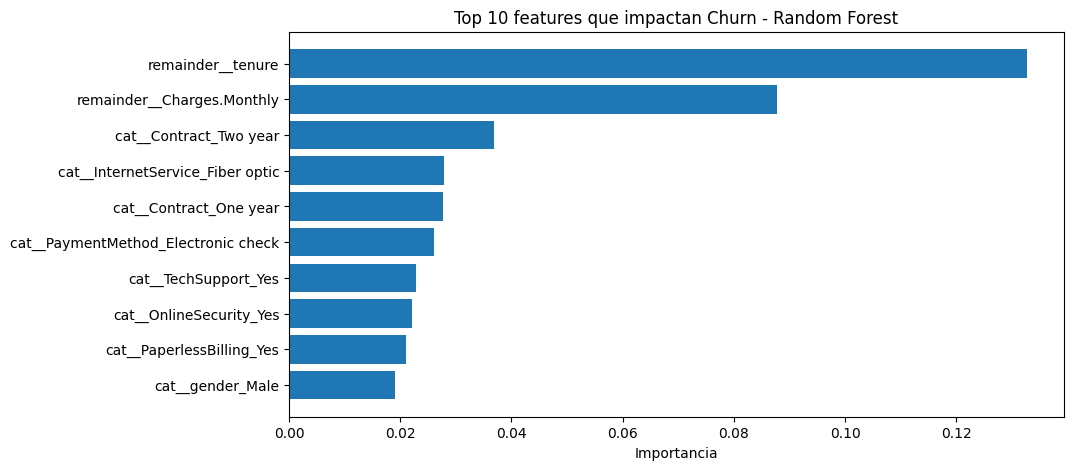

In [ ]:
importances = rf_pipe.named_steps['clf'].feature_importances_

# Top 10 features
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10,5))
plt.barh(range(10), importances[indices][::-1])
plt.yticks(range(10), [feature_names[i] for i in indices][::-1])
plt.xlabel("Importancia")
plt.title("Top 10 features que impactan Churn - Random Forest")
plt.show()


# Informe de Predicción de Cancelación – Telecom X


1️⃣ Introducción

Objetivo: Predecir qué clientes tienen mayor probabilidad de cancelar sus servicios (Churn).

Problema: La cancelación de clientes genera pérdida de ingresos y afecta la planificación estratégica de Telecom X.

Enfoque: Uso de modelos de Machine Learning para anticipar cancelaciones y permitir acciones de retención.



2️⃣ Limpieza y Tratamiento de Datos

- Se eliminaron columnas irrelevantes, como customerID.

- Las columnas anidadas (customer, phone, internet, account) se expandieron con pd.json_normalize.

- Variables categóricas fueron codificadas con One-Hot Encoding.

- Se balancearon las clases (Churn) mediante RandomUnderSampler para evitar sesgo hacia la clase mayoritaria.

- Se dividió el dataset en entrenamiento (80%) y prueba (20%), manteniendo la proporción de clases.

- Para modelos sensibles a escala (ej. Regresión Logística), se aplicó normalización con StandardScaler.



3️⃣ Análisis Exploratorio de Datos

- Distribución de Churn: 26% cancelaron, 74% permanecen → ligero desbalance.

- Variables relevantes:

  - Tenure (tiempo de permanencia): clientes con menor tiempo tienden a cancelar más.

  - Charges.Monthly / Charges.Total: clientes con gastos bajos tienen mayor probabilidad de churn.

  - Contract: contratos cortos (Month-to-month) presentan más cancelaciones.

  - PaperlessBilling: clientes con facturación electrónica muestran mayor cancelación.

📊 Visualizaciones realizadas: boxplots, scatter plots y matriz de correlación.


4️⃣ Modelado Predictivo

Modelos entrenados:

- Regresión Logística (con normalización):

  - Accuracy ≈ 0.74

  - F1-score ≈ 0.74

  - Ventaja: interpretabilidad de variables.

- Random Forest (sin normalización):

  - Accuracy ≈ 0.77

  - F1-score ≈ 0.78

  - Mejor desempeño para detectar churners.

📌 Matriz de confusión – Regresión Logística

- Verdaderos negativos (0,0): 271

- Falsos positivos (0,1): 103

- Falsos negativos (1,0): 92

- Verdaderos positivos (1,1): 282

  👉 Comete más errores al identificar clientes que sí cancelan (92 FN).

📌 Matriz de confusión – Random Forest

- Verdaderos negativos (0,0): 277

- Falsos positivos (0,1): 97

- Falsos negativos (1,0): 75

- Verdaderos positivos (1,1): 299

  👉 Random Forest mejora la detección de churners (menos FN).

5️⃣ Importancia de Variables

- Regresión Logística: coeficientes más altos → Contract_Month-to-month, PaperlessBilling_Yes, tenure.

- Random Forest: variables top → Contract, Charges.Monthly, tenure, PaperlessBilling.

📊 Interpretación:

- Contratos cortos y clientes con facturación electrónica son los más propensos a cancelar.

- Tenure bajo es el indicador más fuerte de cancelación.

- Clientes con cargos mensuales bajos también tienen mayor riesgo.


6️⃣ Conclusiones e Insights

- Random Forest es el modelo más efectivo para predecir churn en este dataset.

- Factores clave: contratos cortos, baja permanencia, cargos mensuales y facturación electrónica.

- La detección temprana permite priorizar clientes en riesgo y diseñar estrategias de retención personalizadas.



7️⃣ Recomendaciones Estratégicas

1. Incentivar renovación de contratos cortos mediante descuentos o beneficios exclusivos.

2. Programas de fidelización para clientes con menor tiempo de permanencia.

3. Revisar la experiencia de PaperlessBilling, ofreciendo beneficios adicionales o atención personalizada.

4. Alertas tempranas: monitorear indicadores clave (tenure y gastos mensuales) para anticipar cancelaciones.

5. Programas de beneficios progresivos: recompensas a clientes que superen ciertos hitos de permanencia.